In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
filename = 'housing_prices - housing_prices.csv'
x_raw = []
y_raw = []

with open(filename, 'r') as f:
    lines = f.readlines()
    for line in lines[1:]: # Skip header
        if line.strip():
            parts = line.strip().split(',')
            x_raw.append(float(parts[0]))
            y_raw.append(float(parts[1]))

X = np.array(x_raw)
Y = np.array(y_raw)

# Normalize Data (Crucial for Convergence)
# Z-Score standardization: (val - mean) / std_dev
mu_x = np.mean(X)
sigma_x = np.std(X)
X_norm = (X - mu_x) / sigma_x

mu_y = np.mean(Y)
sigma_y = np.std(Y)
Y_norm = (Y - mu_y) / sigma_y

# Gradient Descent Functions

def compute_cost(X, y, m, b):
    # Mean Squared Error Cost Function
    N = len(y)
    predictions = m * X + b
    squared_errors = (predictions - y) ** 2
    return (1 / (2 * N)) * np.sum(squared_errors)

def gradient_descent(X, y, learning_rate, iterations):
    m = 0
    b = 0
    N = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = m * X + b

        # Calculate Gradients (Partial Derivatives)
        # dm = (1/N) * sum( (pred - y) * x )
        dm = (1/N) * np.sum((predictions - y) * X)

        # db = (1/N) * sum( pred - y )
        db = (1/N) * np.sum(predictions - y)

        # Update Weights
        m = m - learning_rate * dm
        b = b - learning_rate * db

        # Record Cost
        cost_history.append(compute_cost(X, y, m, b))

    return m, b, cost_history

# Train the Model
alpha = 0.1       # Small learning rate
iterations = 1000 # Enough steps to converge

m_norm, b_norm, costs = gradient_descent(X_norm, Y_norm, alpha, iterations)

# Predict (Handling Normalization)
target_sqft = 2500

# Normalize the input
input_norm = (target_sqft - mu_x) / sigma_x

# Predict in the normalized scale
pred_norm = m_norm * input_norm + b_norm

# Denormalize the output to get actual Price
pred_price = pred_norm * sigma_y + mu_y

print(f"Predicted Price for {target_sqft} sq ft: ${pred_price:.2f}")



Predicted Price for 2500 sq ft: $429560.55


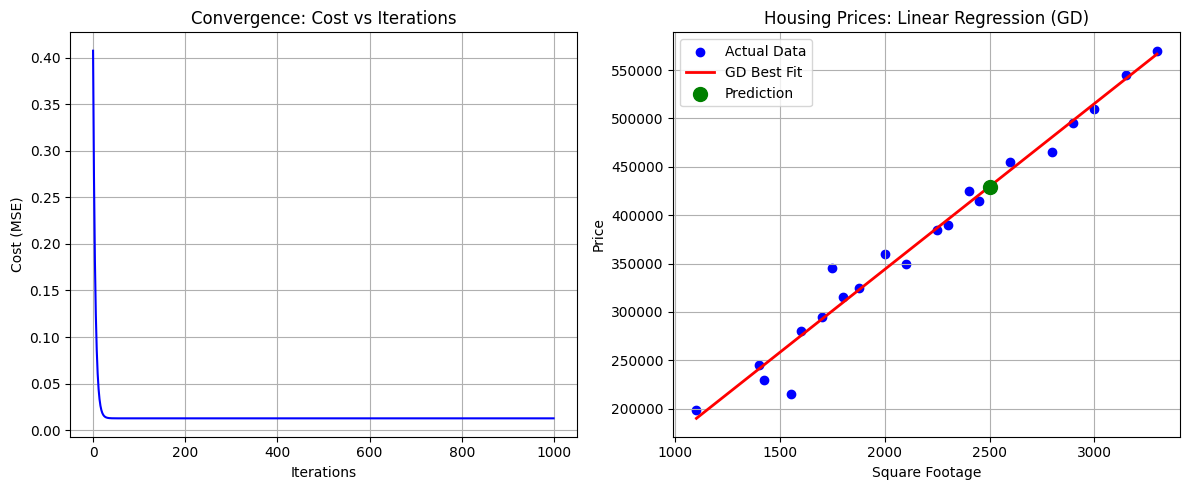

In [3]:
# Plotting
plt.figure(figsize=(12, 5))

# Plot Cost History
plt.subplot(1, 2, 1)
plt.plot(costs, color='blue')
plt.title('Convergence: Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)

# Plot Best Fit Line
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='Actual Data')

# To plot the line, we generate points, normalize them, predict, then denormalize
x_line = np.linspace(min(X), max(X), 100)
x_line_norm = (x_line - mu_x) / sigma_x
y_line_norm = m_norm * x_line_norm + b_norm
y_line = y_line_norm * sigma_y + mu_y

plt.plot(x_line, y_line, color='red', linewidth=2, label='GD Best Fit')
plt.scatter(target_sqft, pred_price, color='green', s=100, zorder=5, label='Prediction')

plt.title('Housing Prices: Linear Regression (GD)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()